Using LDA, QDA, and random forest classifiers to decode stim, and call_type

Apply PCA before these procedures

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

from data_loader import SessionDataLoader
from discriminant_analysis import lda, qda, rf, cross_validate
from spikes.filters import gaussian_filter, exp_filter
from spikes.binning import bin_spikes

%load_ext autoreload
%autoreload 2%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_loader = SessionDataLoader("YelBlu6903F", 1)
table = data_loader.load_table()

In [3]:
table = table[table["call_type"] != "None"]
table = table.copy()

In [4]:
t_arr, spikes = bin_spikes(table["spike_times"], min_time=0.0, max_time=0.6)
spikes_filtered = exp_filter(spikes, 5.0)

table["binned_spikes"] = spikes.tolist()
table["psth"] = spikes_filtered.tolist()

In [5]:
X = np.array(table["psth"].tolist())
Y = np.array(table["stim"])

In [27]:
DIMS = [2, 4, 6, 8, 12, 16, 24, 32, 48]
lda_scores = np.zeros(len(DIMS))
qda_scores = np.zeros(len(DIMS))
rf_scores = np.zeros(len(DIMS))

lda_std = np.zeros(len(DIMS))
qda_std = np.zeros(len(DIMS))
rf_std = np.zeros(len(DIMS))

In [30]:
for i, dim in enumerate(DIMS):
    pca = PCA(n_components=dim)
    X_reduced = pca.fit_transform(X)
    
    scores = cross_validate(X_reduced, Y, lda, folds=10)
    lda_scores[i] = np.mean(scores) * 100.0
    lda_std[i] = np.std(scores) * 100.0
    
    scores = cross_validate(X_reduced, Y, qda, folds=10)
    qda_scores[i] = np.mean(scores) * 100.0
    qda_std[i] = np.std(scores) * 100.0
    
    scores = cross_validate(X_reduced, Y, rf, folds=10)
    rf_scores[i] = np.mean(scores) * 100.0
    rf_std[i] = np.std(scores) * 100.0

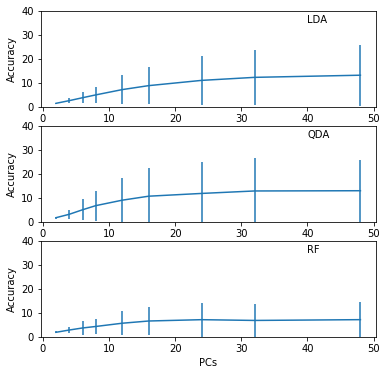

In [34]:
plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 1)
plt.errorbar(DIMS, lda_scores, yerr=lda_std, label="LDA")
plt.xlabel("PCs")
plt.ylabel("Accuracy")
plt.ylim(0, 40)
plt.text(40, 35, "LDA")

plt.subplot(3, 1, 2)
plt.errorbar(DIMS, qda_scores, yerr=qda_std, label="QDA")
plt.xlabel("PCs")
plt.ylabel("Accuracy")
plt.ylim(0, 40)
plt.text(40, 35, "QDA")

plt.subplot(3, 1, 3)
plt.errorbar(DIMS, rf_scores, yerr=rf_std, label="RF")
plt.xlabel("PCs")
plt.ylabel("Accuracy")
plt.ylim(0, 40)
plt.text(40, 35, "RF")

plt.show()

The number of stims will be annoying to plot since I need a different color for each. So for the visualization example I'll decode by call_type. Otherwise, you could also loop through colors

In [58]:
# colors = {
#     4: (0/255.0, 230/255.0, 255/255.0),
#     5: (0/255.0, 95/255.0, 255/255.0),
#     8: (255/255.0, 200/255.0, 65/255.0),
#     0: (255/255.0, 150/255.0, 40/255.0),
#     3: (255/255.0, 105/255.0, 15/255.0),
#     1: (255/255.0, 0/255.0, 0/255.0),
#     6: (255/255.0, 100/255.0, 255/255.0),
#     7: (140/255.0, 100/255.0, 185/255.0),
#     2: (100/255.0, 50/255.0, 200/255.0),
#     9: (255/255.0, 255/255.0, 255/255.0)
# }